In [2]:
!ls

data	  dataset.py	      explore_LayoutLM.ipynb  README.md
data.dvc  explore_data.ipynb  LICENSE		      requirements.txt


In [3]:
import os
import cv2 as cv
import glob
import json
import imageio
import matplotlib.pyplot as plt

In [4]:
with open("data/raw/train/train_v1.0.json") as train_json:
    train_dict = json.load(train_json)

In [6]:
train_dict.keys(), len(train_dict)

(dict_keys(['dataset_name', 'dataset_version', 'dataset_split', 'data']), 4)

In [8]:
len(train_dict["data"])

39463

In [9]:
train_dict["data"][0]

{'questionId': 337,
 'question': 'what is the date mentioned in this letter?',
 'image': 'documents/xnbl0037_1.png',
 'docId': 279,
 'ucsf_document_id': 'xnbl0037',
 'ucsf_document_page_no': '1',
 'answers': ['1/8/93'],
 'data_split': 'train'}

In [27]:
train_dict["dataset_name"], train_dict["dataset_version"], train_dict["dataset_split"], train_dict["data"][0]

('docvqa',
 '1.0',
 'train',
 {'questionId': 337,
  'question': 'what is the date mentioned in this letter?',
  'image': 'documents/xnbl0037_1.png',
  'docId': 279,
  'ucsf_document_id': 'xnbl0037',
  'ucsf_document_page_no': '1',
  'answers': ['1/8/93'],
  'data_split': 'train'})

In [28]:
sample = train_dict["data"][0]
train_path = "data/raw/train/"
image_path = train_path + str(sample["image"])
image = imageio.imread(image_path)

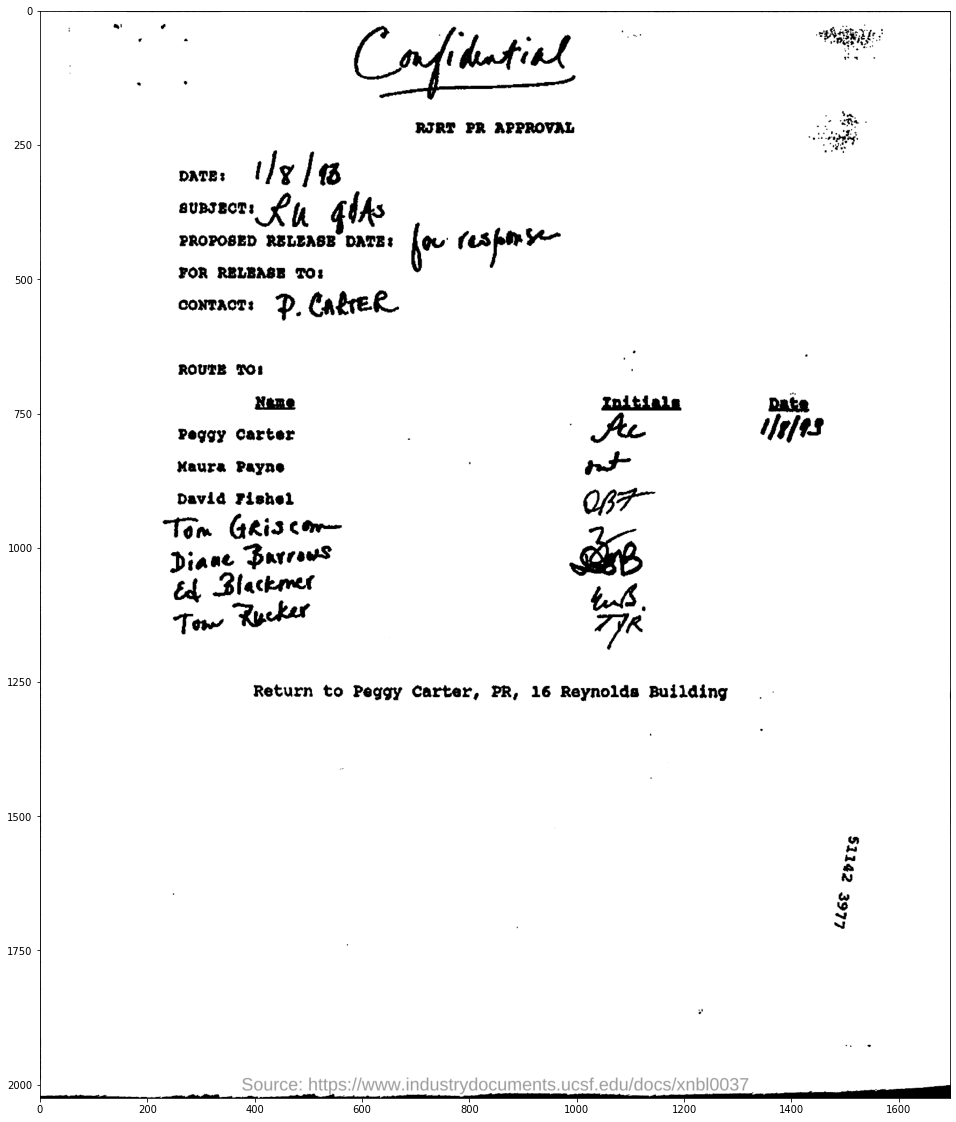

In [29]:
plt.figure(figsize=(20, 20))
plt.imshow(image, cmap="gray")
plt.show()

In [30]:
ocr_path = os.path.join(train_path, "ocr_results", os.path.basename(image_path)[:-4] + ".json")

with open(ocr_path) as ocr_file:
    ocr = json.load(ocr_file)

In [31]:
ocr

{'status': 'Succeeded',
 'recognitionResults': [{'page': 1,
   'clockwiseOrientation': 359.79,
   'width': 1695,
   'height': 2025,
   'unit': 'pixel',
   'lines': [{'boundingBox': [576, 30, 992, 26, 993, 126, 577, 130],
     'text': 'Confidential',
     'words': [{'boundingBox': [586, 30, 993, 36, 994, 119, 584, 131],
       'text': 'Confidential',
       'confidence': 'Low'}]},
    {'boundingBox': [1081, 34, 1124, 31, 1125, 53, 1082, 56],
     'text': '.. ..',
     'words': [{'boundingBox': [1080, 34, 1097, 32, 1099, 54, 1081, 55],
       'text': '..',
       'confidence': 'Low'},
      {'boundingBox': [1102, 32, 1122, 31, 1124, 53, 1103, 54],
       'text': '..'}]},
    {'boundingBox': [695, 202, 994, 204, 994, 236, 694, 234],
     'text': 'RJRT PR APPROVAL',
     'words': [{'boundingBox': [699, 203, 779, 204, 779, 234, 699, 234],
       'text': 'RJRT',
       'confidence': 'Low'},
      {'boundingBox': [793, 204, 832, 204, 832, 234, 793, 234], 'text': 'PR'},
      {'boundingBox': [

In [32]:
nlines = len(ocr['recognitionResults'][0]['lines'])
nlines

27

In [18]:
image.shape, image.max()

((2025, 1695), 255)

Confidential
.. ..
RJRT PR APPROVAL
DATE :
1/8/13
Ru alAs
PROPOSED RELEASE DATE:
for response
FOR RELEASE TO:
CONTACT:
P. CARTER
ROUTE TO
Initials
pate
Peggy Carter
Ac
Maura Payne
David Fishel
Tom GRISCom
Diane Barrows
Ed Blackmer
Tow Rucker
TR
Return to Peggy Carter, PR, 16 Reynolds Building
51142 3977
. .
Source: https://www.industrydocuments.ucsf.edu/docs/xnb10037


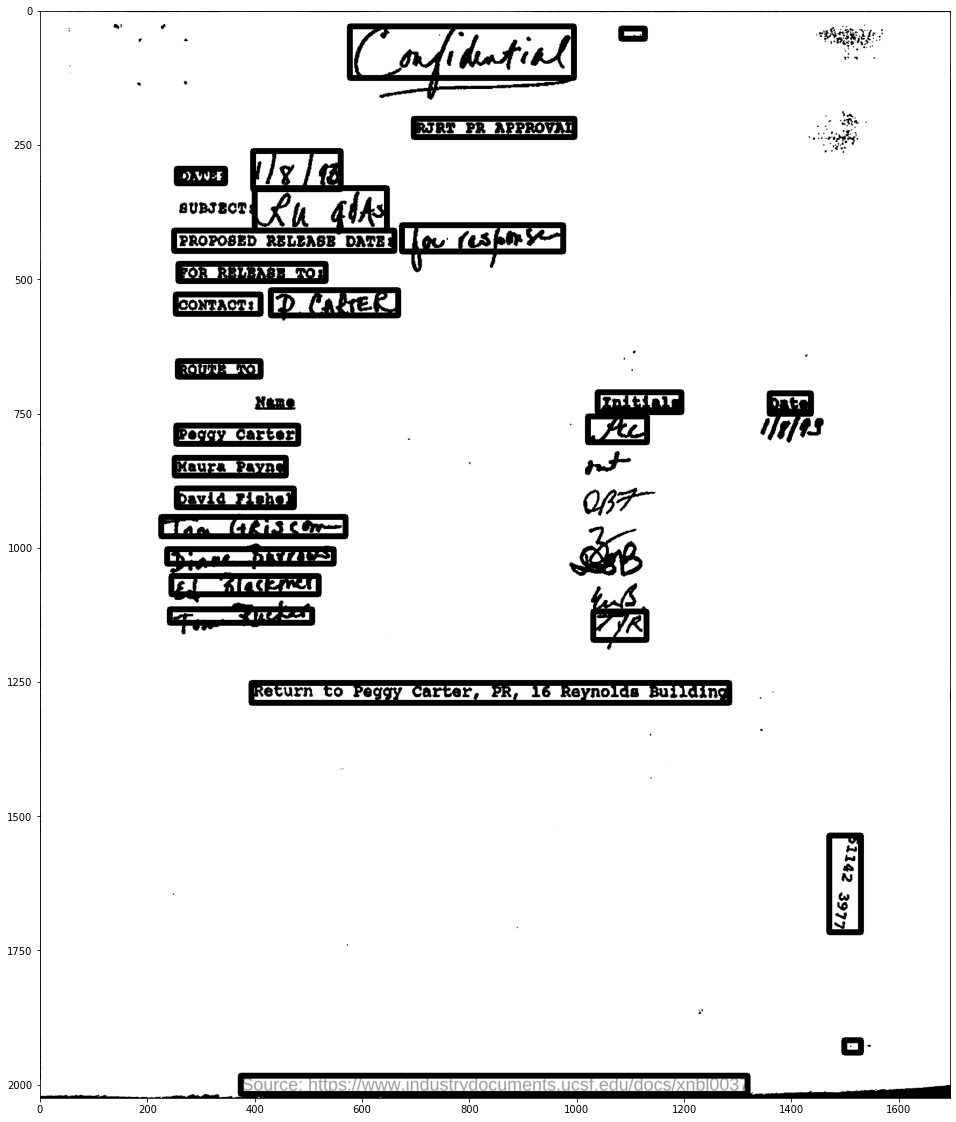

In [34]:
display_bbox = image.copy()
for i in range(nlines):    
    bbox = ocr['recognitionResults'][0]['lines'][i]['boundingBox']
    text = ocr['recognitionResults'][0]['lines'][i]['text']

    pt1 = bbox[:2]
    pt2 = bbox[4:6]
    display_bbox = cv.rectangle(display_bbox, tuple(pt1), tuple(pt2), 0, 10)
    print(text)
plt.figure(figsize=(20, 20))
plt.imshow(display_bbox, cmap="gray")
plt.show()